<a href="https://colab.research.google.com/github/ghazalv/usersegmentation/blob/main/segmentation1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# load the dataset into a Pandas DataFrame

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/dataset_for_analyst_assignment_20201120.csv")

print(df.head())


In [13]:
# Create a new DataFrame with the relevant columns
seg_df = df[['USER_ID', 'PURCHASE_COUNT', 'TOTAL_PURCHASES_EUR', 'AVG_PURCHASE_VALUE_EUR', 'FIRST_PURCHASE_DAY', 'LAST_PURCHASE_DAY']]


In [14]:
# Calculate summary statistics for the variables

summary = seg_df.groupby('USER_ID').agg(
    PURCHASE_COUNT=('PURCHASE_COUNT', 'sum'),
    TOTAL_PURCHASES_EUR=('TOTAL_PURCHASES_EUR', 'sum'),
    AVG_PURCHASE_VALUE_EUR=('AVG_PURCHASE_VALUE_EUR', 'mean'),
    DAYS_BETWEEN_PURCHASES=('LAST_PURCHASE_DAY', lambda x: (pd.to_datetime(x).max() - pd.to_datetime(x).min()).days)
)



In [15]:
#create segment
summary['VALUE_SEGMENT'] = np.where(summary['TOTAL_PURCHASES_EUR'] < 50, 'Low-Value', np.where(summary['TOTAL_PURCHASES_EUR'] > 500, 'High-Value', 'Medium-Value'))

summary['FREQUENCY_SEGMENT'] = np.where(summary['PURCHASE_COUNT'] > 10, 'Frequent', 'Infrequent')

recent_days = 30
summary['RECENCY_SEGMENT'] = np.where(summary['DAYS_BETWEEN_PURCHASES'] <= recent_days, 'Recent', 'Not Recent')

summary['LOYALTY_SEGMENT'] = np.where(summary['DAYS_BETWEEN_PURCHASES'] > 0, summary['PURCHASE_COUNT'] / summary['DAYS_BETWEEN_PURCHASES'], 0)
summary['LOYALTY_SEGMENT'] = np.where(summary['LOYALTY_SEGMENT'] >= 0.5, 'Loyal', 'Not Loyal')


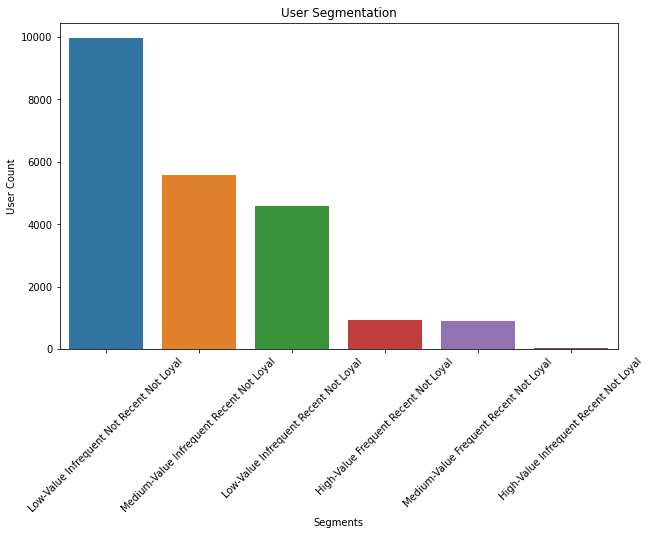

In [18]:
#result visualization
summary['USER_SEGMENT'] = summary['VALUE_SEGMENT'] + ' ' + summary['FREQUENCY_SEGMENT'] + ' ' + summary['RECENCY_SEGMENT'] + ' ' + summary['LOYALTY_SEGMENT']
segment_counts = summary['USER_SEGMENT'].value_counts().reset_index()
segment_counts.columns = ['USER_SEGMENT', 'USER_COUNT']

plt.figure(figsize=(10, 6))
sns.barplot(x='USER_SEGMENT', y='USER_COUNT', data=segment_counts)
plt.title('User Segmentation')
plt.xlabel('Segments')
plt.ylabel('User Count')
plt.xticks(rotation=45)
plt.show()
